For the purpose of my project, I have decided to analyze complaints that have been filed with the NYPD. I am interested to see whether or not complaint types have  changed since the COVID-19 pandemic. I found this dataset
on the NYC open data website and can be downloaded here: 

https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

The New York Public Data website is a city run source that uploads all collected city data onto its server for public use.

The dataset contains all violations, felonies and misdemeanors that have been reported to the NYPD. The original dataset contains all reports from 2006 to July 15th, 2019. For my project I will be analyzing 222,843 complaints filed between July 15th, 2019 to July 1st.


In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

In [63]:
df = pd.read_csv("NYPD_Complaint_Data_Historic.csv",parse_dates={'Date Reported':['RPT_DT']})
df

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date Reported,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,2019-07-15,681642269,07/15/2019,07:40:00,07/15/2019,07:50:00,26,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,DRUG STORE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,993639.0,232628.0,UNKNOWN,UNKNOWN,U,NaN,40.805189,-73.966087,"(40.80518926800005, -73.96608695599997)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D
1,2019-07-15,138266192,07/14/2019,23:30:00,07/15/2019,07:30:00,24,107,BURGLARY,213.0,"BURGLARY,COMMERCIAL,NIGHT",COMPLETED,FELONY,MANHATTAN,NaN,BAR/NIGHT CLUB,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,993076.0,232814.0,UNKNOWN,UNKNOWN,U,NaN,40.805700,-73.968120,"(40.80570036700004, -73.96812035199997)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D
2,2019-07-15,600450244,07/15/2019,12:25:00,07/15/2019,12:40:00,100,351,CRIMINAL MISCHIEF & RELATED OF,259.0,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",COMPLETED,MISDEMEANOR,QUEENS,FRONT OF,SHOE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1029849.0,150701.0,NaN,NaN,NaN,NaN,40.580206,-73.835846,"(40.58020640900003, -73.83584566999997)",PATROL BORO QUEENS SOUTH,NaN,65+,WHITE,M
3,2019-07-15,607151429,07/13/2019,03:10:00,NaN,NaN,49,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,REAR OF,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1024966.0,253363.0,UNKNOWN,BLACK,M,NaN,40.862012,-73.852803,"(40.86201197400004, -73.85280334099997)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
4,2019-07-15,319053049,07/14/2019,05:37:00,07/14/2019,06:30:00,69,114,ARSON,263.0,"ARSON 2,3,4",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE-HOUSE,OTHER,97.0,NaN,NaN,NaN,1015294.0,173667.0,UNKNOWN,UNKNOWN,U,NaN,40.643306,-73.888138,"(40.64330622600005, -73.88813782199998)",PATROL BORO BKLYN SOUTH,NaN,UNKNOWN,UNKNOWN,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222838,2019-12-31,118482921,12/01/2018,08:00:00,NaN,NaN,63,116,SEX CRIMES,177.0,SEXUAL ABUSE,COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000448.0,168068.0,<18,WHITE HISPANIC,M,NaN,40.627978,-73.941647,"(40.627977755000074, -73.94164715699996)",PATROL BORO BKLYN SOUTH,NaN,<18,WHITE HISPANIC,F
222839,2019-12-31,856705358,01/01/2009,08:00:00,01/01/2013,08:00:00,75,116,SEX CRIMES,177.0,SEXUAL ABUSE,COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1017141.0,183798.0,UNKNOWN,UNKNOWN,F,NaN,40.671107,-73.881433,"(40.67110691100004, -73.88143295699997)",PATROL BORO BKLYN NORTH,NaN,<18,BLACK,F
222840,2019-12-31,179829648,04/11/2009,00:01:00,04/10/2011,23:59:00,28,104,RAPE,157.0,RAPE 1,COMPLETED,FELONY,MANHATTAN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2.0,NaN,KING TOWERS,638.0,997376.0,233927.0,18-24,UNKNOWN,M,NaN,40.808750,-73.952586,"(40.80874990400008, -73.95258580599993)",PATROL BORO MAN NORTH,NaN,<18,WHITE HISPANIC,F
222841,2019-12-31,346579207,12/31/2013,14:00:00,NaN,NaN,14,351,CRIMINAL MISCHIEF & RELATED OF,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",COMPLETED,MISDEMEANOR,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,988464.0,210789.0,UNKNOWN,UNKNOWN,U,NaN,40.745251,-73.984794,"(40.745250921000036, -73.98479353399993)",PATROL BORO MAN SOUTH,NaN,UNKNOWN,UNKNOWN,E


In [64]:
df.dtypes

Date Reported        datetime64[ns]
CMPLNT_NUM                    int64
CMPLNT_FR_DT                 object
CMPLNT_FR_TM                 object
CMPLNT_TO_DT                 object
CMPLNT_TO_TM                 object
ADDR_PCT_CD                   int64
KY_CD                         int64
OFNS_DESC                    object
PD_CD                       float64
PD_DESC                      object
CRM_ATPT_CPTD_CD             object
LAW_CAT_CD                   object
BORO_NM                      object
LOC_OF_OCCUR_DESC            object
PREM_TYP_DESC                object
JURIS_DESC                   object
JURISDICTION_CODE           float64
PARKS_NM                     object
HADEVELOPT                   object
HOUSING_PSA                  object
X_COORD_CD                  float64
Y_COORD_CD                  float64
SUSP_AGE_GROUP               object
SUSP_RACE                    object
SUSP_SEX                     object
TRANSIT_DISTRICT            float64
Latitude                    

# Data Cleaning

In [65]:
#seeing if there are any duplicates in the dataset
dup_filter = df["CMPLNT_NUM"].duplicated()
df[dup_filter]

,Date Reported,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
1419,2019-07-15,710533800,12/16/2010,00:01:00,12/16/2015,00:01:00,110,116,SEX CRIMES,177.0,SEXUAL ABUSE,COMPLETED,FELONY,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1020255.0,210816.0,25-44,WHITE HISPANIC,M,NaN,40.745253,-73.870063,"(40.74525274100006, -73.87006286999997)",PATROL BORO QUEENS NORTH,NaN,<18,WHITE HISPANIC,F
1420,2019-07-15,427903821,11/17/2018,00:00:00,07/15/2019,19:30:00,24,112,THEFT-FRAUD,739.0,"FRAUD,UNCLASSIFIED-FELONY",COMPLETED,FELONY,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,992461.0,227653.0,UNKNOWN,UNKNOWN,U,NaN,40.791535,-73.970348,"(40.79153542000005, -73.97034815299997)",PATROL BORO MAN NORTH,NaN,45-64,WHITE,F
1421,2019-07-15,629933836,11/14/2018,22:27:00,07/14/2019,20:00:00,101,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,QUEENS,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1051092.0,159338.0,25-44,ASIAN / PACIFIC ISLANDER,M,NaN,40.603778,-73.759286,"(40.603778440000035, -73.75928604599994)",PATROL BORO QUEENS SOUTH,NaN,25-44,ASIAN / PACIFIC ISLANDER,F
1422,2019-07-15,517737353,02/26/2018,00:00:00,02/27/2018,23:59:00,106,109,GRAND LARCENY,418.0,"LARCENY,GRAND BY ACQUIRING LOST CREDIT CARD",COMPLETED,FELONY,QUEENS,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1028605.0,187930.0,UNKNOWN,UNKNOWN,U,NaN,40.682398,-73.840079,"(40.68239828900005, -73.84007936899997)",PATROL BORO QUEENS SOUTH,NaN,18-24,BLACK HISPANIC,F
1423,2019-07-15,460016170,07/15/2018,09:03:00,07/15/2019,09:05:00,84,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,BROOKLYN,INSIDE,PUBLIC BUILDING,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,987424.0,190923.0,25-44,WHITE,M,NaN,40.690724,-73.988556,"(40.69072394800003, -73.98855615699993)",PATROL BORO BKLYN NORTH,NaN,45-64,BLACK,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222838,2019-12-31,118482921,12/01/2018,08:00:00,NaN,NaN,63,116,SEX CRIMES,177.0,SEXUAL ABUSE,COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000448.0,168068.0,<18,WHITE HISPANIC,M,NaN,40.627978,-73.941647,"(40.627977755000074, -73.94164715699996)",PATROL BORO BKLYN SOUTH,NaN,<18,WHITE HISPANIC,F
222839,2019-12-31,856705358,01/01/2009,08:00:00,01/01/2013,08:00:00,75,116,SEX CRIMES,177.0,SEXUAL ABUSE,COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1017141.0,183798.0,UNKNOWN,UNKNOWN,F,NaN,40.671107,-73.881433,"(40.67110691100004, -73.88143295699997)",PATROL BORO BKLYN NORTH,NaN,<18,BLACK,F
222840,2019-12-31,179829648,04/11/2009,00:01:00,04/10/2011,23:59:00,28,104,RAPE,157.0,RAPE 1,COMPLETED,FELONY,MANHATTAN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2.0,NaN,KING TOWERS,638.0,997376.0,233927.0,18-24,UNKNOWN,M,NaN,40.808750,-73.952586,"(40.80874990400008, -73.95258580599993)",PATROL BORO MAN NORTH,NaN,<18,WHITE HISPANIC,F
222841,2019-12-31,346579207,12/31/2013,14:00:00,NaN,NaN,14,351,CRIMINAL MISCHIEF & RELATED OF,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",COMPLETED,MISDEMEANOR,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,988464.0,210789.0,UNKNOWN,UNKNOWN,U,NaN,40.745251,-73.984794,"(40.745250921000036, -73.98479353399993)",PATROL BORO MAN SOUTH,NaN,UNKNOWN,UNKNOWN,E


In [66]:
#There are 2935 duplicates in the dataset so I dropped them.
df = df.drop_duplicates()
df

,Date Reported,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,2019-07-15,681642269,07/15/2019,07:40:00,07/15/2019,07:50:00,26,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,DRUG STORE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,993639.0,232628.0,UNKNOWN,UNKNOWN,U,NaN,40.805189,-73.966087,"(40.80518926800005, -73.96608695599997)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D
1,2019-07-15,138266192,07/14/2019,23:30:00,07/15/2019,07:30:00,24,107,BURGLARY,213.0,"BURGLARY,COMMERCIAL,NIGHT",COMPLETED,FELONY,MANHATTAN,NaN,BAR/NIGHT CLUB,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,993076.0,232814.0,UNKNOWN,UNKNOWN,U,NaN,40.805700,-73.968120,"(40.80570036700004, -73.96812035199997)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D
2,2019-07-15,600450244,07/15/2019,12:25:00,07/15/2019,12:40:00,100,351,CRIMINAL MISCHIEF & RELATED OF,259.0,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",COMPLETED,MISDEMEANOR,QUEENS,FRONT OF,SHOE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1029849.0,150701.0,NaN,NaN,NaN,NaN,40.580206,-73.835846,"(40.58020640900003, -73.83584566999997)",PATROL BORO QUEENS SOUTH,NaN,65+,WHITE,M
3,2019-07-15,607151429,07/13/2019,03:10:00,NaN,NaN,49,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,REAR OF,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1024966.0,253363.0,UNKNOWN,BLACK,M,NaN,40.862012,-73.852803,"(40.86201197400004, -73.85280334099997)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
4,2019-07-15,319053049,07/14/2019,05:37:00,07/14/2019,06:30:00,69,114,ARSON,263.0,"ARSON 2,3,4",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE-HOUSE,OTHER,97.0,NaN,NaN,NaN,1015294.0,173667.0,UNKNOWN,UNKNOWN,U,NaN,40.643306,-73.888138,"(40.64330622600005, -73.88813782199998)",PATROL BORO BKLYN SOUTH,NaN,UNKNOWN,UNKNOWN,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222838,2019-12-31,118482921,12/01/2018,08:00:00,NaN,NaN,63,116,SEX CRIMES,177.0,SEXUAL ABUSE,COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000448.0,168068.0,<18,WHITE HISPANIC,M,NaN,40.627978,-73.941647,"(40.627977755000074, -73.94164715699996)",PATROL BORO BKLYN SOUTH,NaN,<18,WHITE HISPANIC,F
222839,2019-12-31,856705358,01/01/2009,08:00:00,01/01/2013,08:00:00,75,116,SEX CRIMES,177.0,SEXUAL ABUSE,COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1017141.0,183798.0,UNKNOWN,UNKNOWN,F,NaN,40.671107,-73.881433,"(40.67110691100004, -73.88143295699997)",PATROL BORO BKLYN NORTH,NaN,<18,BLACK,F
222840,2019-12-31,179829648,04/11/2009,00:01:00,04/10/2011,23:59:00,28,104,RAPE,157.0,RAPE 1,COMPLETED,FELONY,MANHATTAN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2.0,NaN,KING TOWERS,638.0,997376.0,233927.0,18-24,UNKNOWN,M,NaN,40.808750,-73.952586,"(40.80874990400008, -73.95258580599993)",PATROL BORO MAN NORTH,NaN,<18,WHITE HISPANIC,F
222841,2019-12-31,346579207,12/31/2013,14:00:00,NaN,NaN,14,351,CRIMINAL MISCHIEF & RELATED OF,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",COMPLETED,MISDEMEANOR,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,988464.0,210789.0,UNKNOWN,UNKNOWN,U,NaN,40.745251,-73.984794,"(40.745250921000036, -73.98479353399993)",PATROL BORO MAN SOUTH,NaN,UNKNOWN,UNKNOWN,E


In [67]:
#Renaming columns
df.rename(columns = {"CMPLNT_NUM":"Complaint ID", "CRM_ATPT_CPTD_CD":"Crime Completion", "JURIS_DESC":"Jurisdiction", "LAW_CAT_CD": "Level of Offense", "LOC_OF_OCCUR_DESC":"Location of Occurence", "OFNS_DESC": "Offense Description", "BORO_NM":"Borough", "PREM_TYP_DESC":"Premises Description", "SUSP_AGE_GROUP":"Suspect Age", "SUSP_RACE":"Suspect Race", "SUSP_SEX": "Suspect Sex", "VIC_AGE_GROUP":"Victim Age", "VIC_RACE":"Victim Race", "VIC_SEX":"Victim Sex"}, inplace = True)
df

/Users/karenbritt/Library/Python/3.8/lib/python/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Date Reported,Complaint ID,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,KY_CD,Offense Description,PD_CD,PD_DESC,Crime Completion,Level of Offense,Borough,Location of Occurence,Premises Description,Jurisdiction,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,Suspect Age,Suspect Race,Suspect Sex,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,Victim Age,Victim Race,Victim Sex
0,2019-07-15,681642269,07/15/2019,07:40:00,07/15/2019,07:50:00,26,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,DRUG STORE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,993639.0,232628.0,UNKNOWN,UNKNOWN,U,NaN,40.805189,-73.966087,"(40.80518926800005, -73.96608695599997)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D
1,2019-07-15,138266192,07/14/2019,23:30:00,07/15/2019,07:30:00,24,107,BURGLARY,213.0,"BURGLARY,COMMERCIAL,NIGHT",COMPLETED,FELONY,MANHATTAN,NaN,BAR/NIGHT CLUB,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,993076.0,232814.0,UNKNOWN,UNKNOWN,U,NaN,40.805700,-73.968120,"(40.80570036700004, -73.96812035199997)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D
2,2019-07-15,600450244,07/15/2019,12:25:00,07/15/2019,12:40:00,100,351,CRIMINAL MISCHIEF & RELATED OF,259.0,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",COMPLETED,MISDEMEANOR,QUEENS,FRONT OF,SHOE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1029849.0,150701.0,NaN,NaN,NaN,NaN,40.580206,-73.835846,"(40.58020640900003, -73.83584566999997)",PATROL BORO QUEENS SOUTH,NaN,65+,WHITE,M
3,2019-07-15,607151429,07/13/2019,03:10:00,NaN,NaN,49,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,REAR OF,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1024966.0,253363.0,UNKNOWN,BLACK,M,NaN,40.862012,-73.852803,"(40.86201197400004, -73.85280334099997)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
4,2019-07-15,319053049,07/14/2019,05:37:00,07/14/2019,06:30:00,69,114,ARSON,263.0,"ARSON 2,3,4",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE-HOUSE,OTHER,97.0,NaN,NaN,NaN,1015294.0,173667.0,UNKNOWN,UNKNOWN,U,NaN,40.643306,-73.888138,"(40.64330622600005, -73.88813782199998)",PATROL BORO BKLYN SOUTH,NaN,UNKNOWN,UNKNOWN,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222838,2019-12-31,118482921,12/01/2018,08:00:00,NaN,NaN,63,116,SEX CRIMES,177.0,SEXUAL ABUSE,COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000448.0,168068.0,<18,WHITE HISPANIC,M,NaN,40.627978,-73.941647,"(40.627977755000074, -73.94164715699996)",PATROL BORO BKLYN SOUTH,NaN,<18,WHITE HISPANIC,F
222839,2019-12-31,856705358,01/01/2009,08:00:00,01/01/2013,08:00:00,75,116,SEX CRIMES,177.0,SEXUAL ABUSE,COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1017141.0,183798.0,UNKNOWN,UNKNOWN,F,NaN,40.671107,-73.881433,"(40.67110691100004, -73.88143295699997)",PATROL BORO BKLYN NORTH,NaN,<18,BLACK,F
222840,2019-12-31,179829648,04/11/2009,00:01:00,04/10/2011,23:59:00,28,104,RAPE,157.0,RAPE 1,COMPLETED,FELONY,MANHATTAN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2.0,NaN,KING TOWERS,638.0,997376.0,233927.0,18-24,UNKNOWN,M,NaN,40.808750,-73.952586,"(40.80874990400008, -73.95258580599993)",PATROL BORO MAN NORTH,NaN,<18,WHITE HISPANIC,F
222841,2019-12-31,346579207,12/31/2013,14:00:00,NaN,NaN,14,351,CRIMINAL MISCHIEF & RELATED OF,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",COMPLETED,MISDEMEANOR,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,988464.0,210789.0,UNKNOWN,UNKNOWN,U,NaN,40.745251,-73.984794,"(40.745250921000036, -73.98479353399993)",PATROL BORO MAN SOUTH,NaN,UNKNOWN,UNKNOWN,E


In [68]:
#New updated dataset with fewer columns
df = df[["Date Reported", "Borough", "Offense Description", "Crime Completion", "Level of Offense", "Location of Occurence", "Premises Description","Suspect Age", "Suspect Race", "Suspect Sex", "Victim Age", "Victim Race", "Victim Sex", "Latitude", "Longitude"]]
df

,Date Reported,Borough,Offense Description,Crime Completion,Level of Offense,Location of Occurence,Premises Description,Suspect Age,Suspect Race,Suspect Sex,Victim Age,Victim Race,Victim Sex,Latitude,Longitude
0,2019-07-15,MANHATTAN,PETIT LARCENY,COMPLETED,MISDEMEANOR,INSIDE,DRUG STORE,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,D,40.805189,-73.966087
1,2019-07-15,MANHATTAN,BURGLARY,COMPLETED,FELONY,NaN,BAR/NIGHT CLUB,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,D,40.805700,-73.968120
2,2019-07-15,QUEENS,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,FRONT OF,SHOE,NaN,NaN,NaN,65+,WHITE,M,40.580206,-73.835846
3,2019-07-15,BRONX,HARRASSMENT 2,COMPLETED,VIOLATION,REAR OF,RESIDENCE-HOUSE,UNKNOWN,BLACK,M,25-44,WHITE HISPANIC,F,40.862012,-73.852803
4,2019-07-15,BROOKLYN,ARSON,COMPLETED,FELONY,INSIDE,RESIDENCE-HOUSE,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,E,40.643306,-73.888138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222838,2019-12-31,BROOKLYN,SEX CRIMES,COMPLETED,FELONY,INSIDE,RESIDENCE-HOUSE,<18,WHITE HISPANIC,M,<18,WHITE HISPANIC,F,40.627978,-73.941647
222839,2019-12-31,BROOKLYN,SEX CRIMES,COMPLETED,FELONY,INSIDE,RESIDENCE - APT. HOUSE,UNKNOWN,UNKNOWN,F,<18,BLACK,F,40.671107,-73.881433
222840,2019-12-31,MANHATTAN,RAPE,COMPLETED,FELONY,INSIDE,RESIDENCE - PUBLIC HOUSING,18-24,UNKNOWN,M,<18,WHITE HISPANIC,F,40.808750,-73.952586
222841,2019-12-31,MANHATTAN,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,NaN,STREET,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,E,40.745251,-73.984794


In [69]:
g = df.groupby("Offense Description")

g.groups.keys()

dict_keys(['ADMINISTRATIVE CODE', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED', 'ALCOHOLIC BEVERAGE CONTROL LAW', 'ANTICIPATORY OFFENSES', 'ARSON', 'ASSAULT 3 & RELATED OFFENSES', "BURGLAR'S TOOLS", 'BURGLARY', 'CHILD ABANDONMENT/NON SUPPORT', 'CRIMINAL MISCHIEF & RELATED OF', 'CRIMINAL TRESPASS', 'DANGEROUS DRUGS', 'DANGEROUS WEAPONS', 'DISORDERLY CONDUCT', 'DISRUPTION OF A RELIGIOUS SERV', 'ENDAN WELFARE INCOMP', 'ESCAPE 3', 'FELONY ASSAULT', 'FELONY SEX CRIMES', 'FORGERY', 'FRAUDS', 'FRAUDULENT ACCOSTING', 'GAMBLING', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 'HARRASSMENT 2', 'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'HOMICIDE-NEGLIGENT-VEHICLE', 'INTOXICATED & IMPAIRED DRIVING', 'INTOXICATED/IMPAIRED DRIVING', 'JOSTLING', 'KIDNAPPING', 'KIDNAPPING & RELATED OFFENSES', 'LOITERING/GAMBLING (CARDS, DIC', 'MISCELLANEOUS PENAL LAW', 'MURDER & NON-NEGL. MANSLAUGHTER', 'NYS LAWS-UNCLASSIFIED FELONY', 'NYS LAWS-UNCLASSIFIED VIOLATION', 'OFF. AGNST PUB ORD SENSBLTY &', 'OFFENSES AGAINST MARRIAGE

In [70]:
g = df.groupby("Premises Description")

g.groups.keys()

dict_keys(['ABANDONED BUILDING', 'AIRPORT TERMINAL', 'ATM', 'BANK', 'BAR/NIGHT CLUB', 'BEAUTY & NAIL SALON', 'BOOK/CARD', 'BRIDGE', 'BUS (NYC TRANSIT)', 'BUS (OTHER)', 'BUS STOP', 'BUS TERMINAL', 'CANDY STORE', 'CEMETERY', 'CHAIN STORE', 'CHECK CASHING BUSINESS', 'CHURCH', 'CLOTHING/BOUTIQUE', 'COMMERCIAL BUILDING', 'CONSTRUCTION SITE', 'DAYCARE FACILITY', 'DEPARTMENT STORE', 'DOCTOR/DENTIST OFFICE', 'DRUG STORE', 'DRY CLEANER/LAUNDRY', 'FACTORY/WAREHOUSE', 'FAST FOOD', 'FERRY/FERRY TERMINAL', 'FOOD SUPERMARKET', 'GAS STATION', 'GROCERY/BODEGA', 'GYM/FITNESS FACILITY', 'HIGHWAY/PARKWAY', 'HOMELESS SHELTER', 'HOSPITAL', 'HOTEL/MOTEL', 'JEWELRY', 'LIQUOR STORE', 'LOAN COMPANY', 'MAILBOX INSIDE', 'MAILBOX OUTSIDE', 'MARINA/PIER', 'MOSQUE', 'OPEN AREAS (OPEN LOTS)', 'OTHER', 'OTHER HOUSE OF WORSHIP', 'PARK/PLAYGROUND', 'PARKING LOT/GARAGE (PRIVATE)', 'PARKING LOT/GARAGE (PUBLIC)', 'PHOTO/COPY', 'PRIVATE/PAROCHIAL SCHOOL', 'PUBLIC BUILDING', 'PUBLIC SCHOOL', 'RESIDENCE - APT. HOUSE', 'RESID

In [71]:
df['Suspect Age'] = df['Suspect Age'].replace('-964', np.NaN)
df['Suspect Age'] = df['Suspect Age'].replace('-965', np.NaN)
df['Suspect Age'] = df['Suspect Age'].replace('-973', np.NaN)
df['Suspect Age'] = df['Suspect Age'].replace('-966', np.NaN)
df['Suspect Age'] = df['Suspect Age'].replace('2019', np.NaN)
df['Suspect Age'] = df['Suspect Age'].replace('UNKNOWN', np.NaN)

<ipython-input-71-69f99f8000ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suspect Age'] = df['Suspect Age'].replace('-964', np.NaN)
<ipython-input-71-69f99f8000ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suspect Age'] = df['Suspect Age'].replace('-965', np.NaN)
<ipython-input-71-69f99f8000ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [72]:
g = df.groupby("Suspect Age")

g.groups.keys()

dict_keys(['18-24', '25-44', '45-64', '65+', '<18'])

In [73]:
df['Suspect Race'] = df['Suspect Race'].replace('UNKNOWN', np.NaN)

<ipython-input-73-5fad59dfbff0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suspect Race'] = df['Suspect Race'].replace('UNKNOWN', np.NaN)


In [74]:
g = df.groupby("Suspect Race")

g.groups.keys()

dict_keys(['AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'WHITE', 'WHITE HISPANIC'])

In [75]:
df['Suspect Sex'] = df['Suspect Sex'].replace('U', np.NaN)

<ipython-input-75-638626ef4cab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suspect Sex'] = df['Suspect Sex'].replace('U', np.NaN)


In [76]:
g = df.groupby("Suspect Sex")

g.groups.keys()

dict_keys(['F', 'M'])

In [77]:
df['Victim Age'] = df['Victim Age'].replace('-39', np.NaN)
df['Victim Age'] = df['Victim Age'].replace('-50', np.NaN)
df['Victim Age'] = df['Victim Age'].replace('-56', np.NaN)
df['Victim Age'] = df['Victim Age'].replace('-69', np.NaN)
df['Victim Age'] = df['Victim Age'].replace('-71', np.NaN)

df['Victim Age'] = df['Victim Age'].replace('-942', np.NaN)
df['Victim Age'] = df['Victim Age'].replace('-943', np.NaN)
df['Victim Age'] = df['Victim Age'].replace('-948', np.NaN)
df['Victim Age'] = df['Victim Age'].replace('-952', np.NaN)
df['Victim Age'] = df['Victim Age'].replace('-954', np.NaN)

df['Victim Age'] = df['Victim Age'].replace('-961', np.NaN)
df['Victim Age'] = df['Victim Age'].replace('-967', np.NaN)
df['Victim Age'] = df['Victim Age'].replace('1013', np.NaN)
df['Victim Age'] = df['Victim Age'].replace('1018', np.NaN)
df['Victim Age'] = df['Victim Age'].replace('929', np.NaN)

df['Victim Age'] = df['Victim Age'].replace('936', np.NaN)
df['Victim Age'] = df['Victim Age'].replace('941', np.NaN)
df['Victim Age'] = df['Victim Age'].replace('943', np.NaN)
df['Victim Age'] = df['Victim Age'].replace('956', np.NaN)
df['Victim Age'] = df['Victim Age'].replace('UNKNOWN', np.NaN)

<ipython-input-77-a1dc6c4522ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Victim Age'] = df['Victim Age'].replace('-39', np.NaN)
<ipython-input-77-a1dc6c4522ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Victim Age'] = df['Victim Age'].replace('-50', np.NaN)
<ipython-input-77-a1dc6c4522ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [78]:
g = df.groupby("Victim Age")

g.groups.keys()

dict_keys(['18-24', '25-44', '45-64', '65+', '<18'])

In [79]:
df["Victim Race"] = df["Victim Race"].replace('UNKNOWN', np.NaN)

<ipython-input-79-d1e8b858517c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Victim Race"] = df["Victim Race"].replace('UNKNOWN', np.NaN)


In [80]:
g = df.groupby("Victim Race")

g.groups.keys()

dict_keys(['AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'WHITE', 'WHITE HISPANIC'])

In [81]:
df["Victim Sex"] = df["Victim Sex"].replace('D', np.NaN)
df["Victim Sex"] = df["Victim Sex"].replace('E', np.NaN)

<ipython-input-81-490c9282a165>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Victim Sex"] = df["Victim Sex"].replace('D', np.NaN)
<ipython-input-81-490c9282a165>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Victim Sex"] = df["Victim Sex"].replace('E', np.NaN)


In [82]:
g = df.groupby("Victim Sex")

g.groups.keys()

dict_keys(['F', 'M'])

In [83]:
df.dtypes

Date Reported            datetime64[ns]
Borough                          object
Offense Description              object
Crime Completion                 object
Level of Offense                 object
Location of Occurence            object
Premises Description             object
Suspect Age                      object
Suspect Race                     object
Suspect Sex                      object
Victim Age                       object
Victim Race                      object
Victim Sex                       object
Latitude                        float64
Longitude                       float64
dtype: object

# Single variable distribution plots

Text(0, 0.5, 'Number of Suspects')

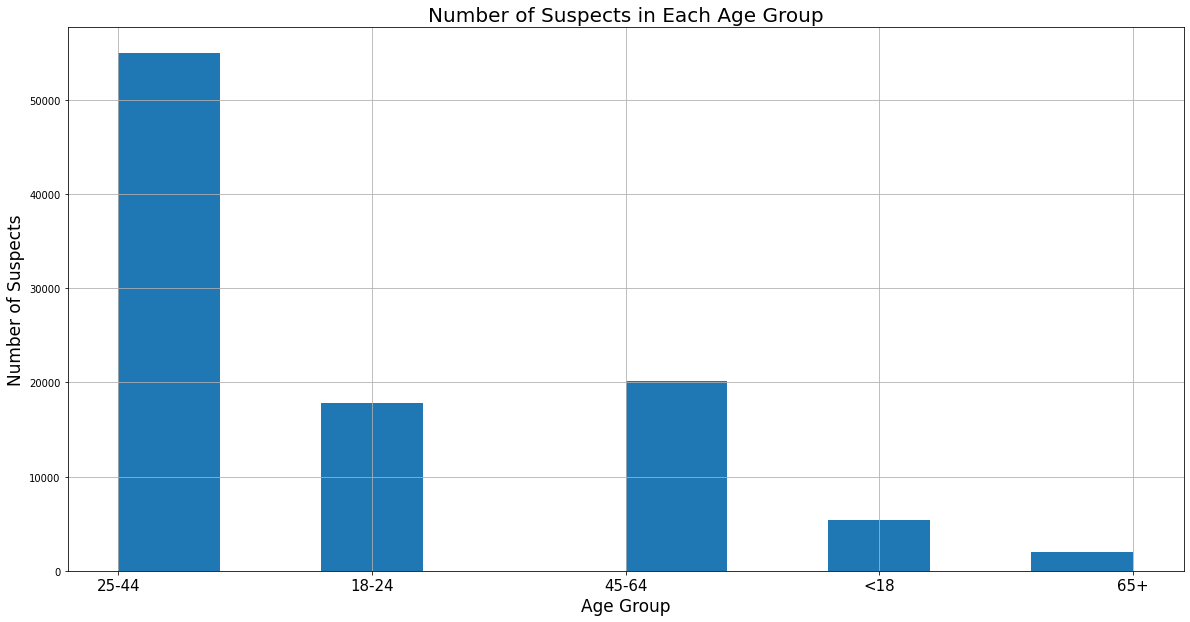

In [84]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=15)
df["Suspect Age"].hist()
plt.title("Number of Suspects in Each Age Group", fontsize=20)
plt.xlabel("Age Group", fontsize=17)
plt.ylabel("Number of Suspects", fontsize=17)

Text(0, 0.5, 'Number of Victims')

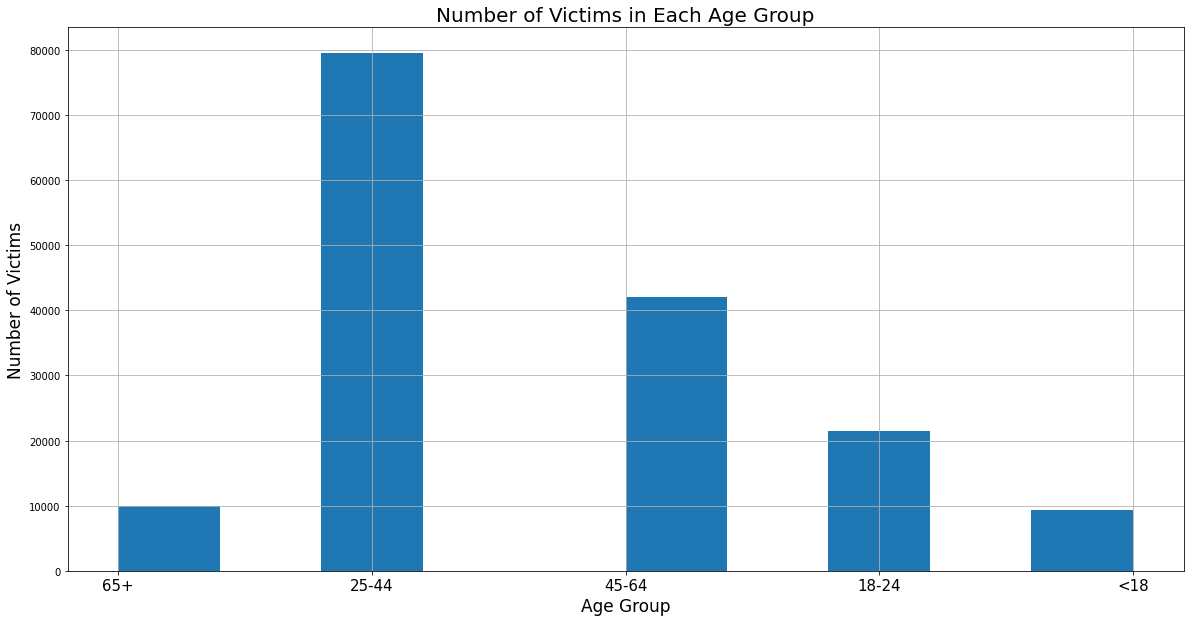

In [85]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=15)
df["Victim Age"].hist()
plt.title("Number of Victims in Each Age Group",fontsize=20)
plt.xlabel("Age Group", fontsize=17)
plt.ylabel("Number of Victims", fontsize=17)

Text(0, 0.5, 'Number of Suspects')

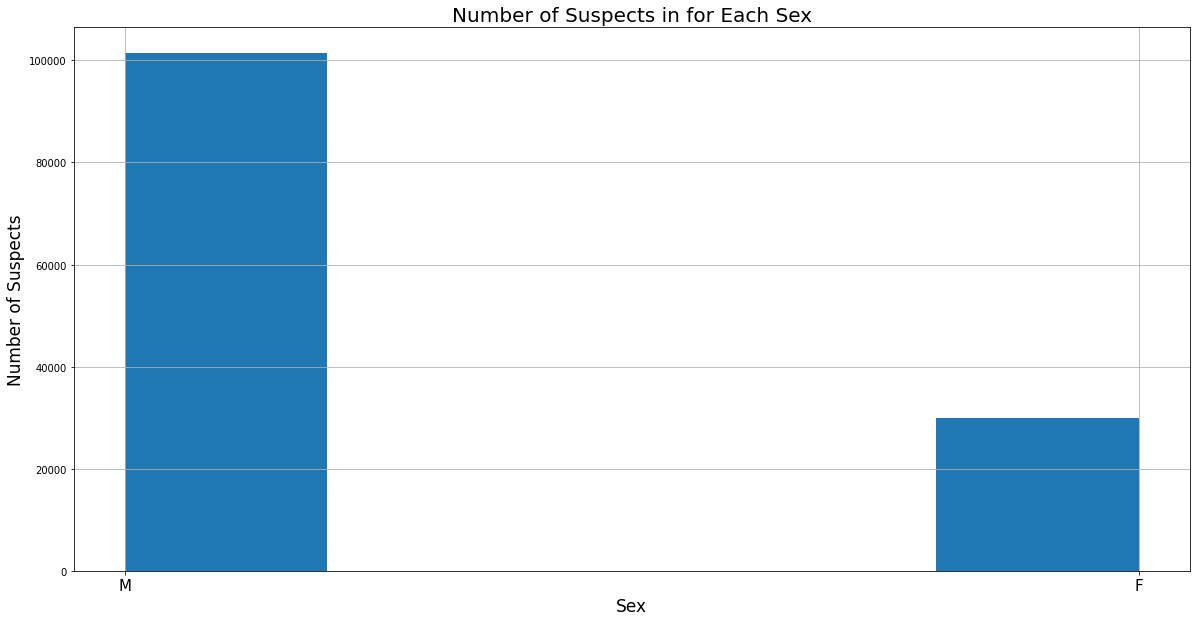

In [97]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=15)
df["Suspect Sex"].hist(bins = 5)
plt.title("Number of Suspects in for Each Sex",fontsize=20)
plt.xlabel("Sex",fontsize=17)
plt.ylabel("Number of Suspects",fontsize=17)

Text(0, 0.5, 'Number of Victim')

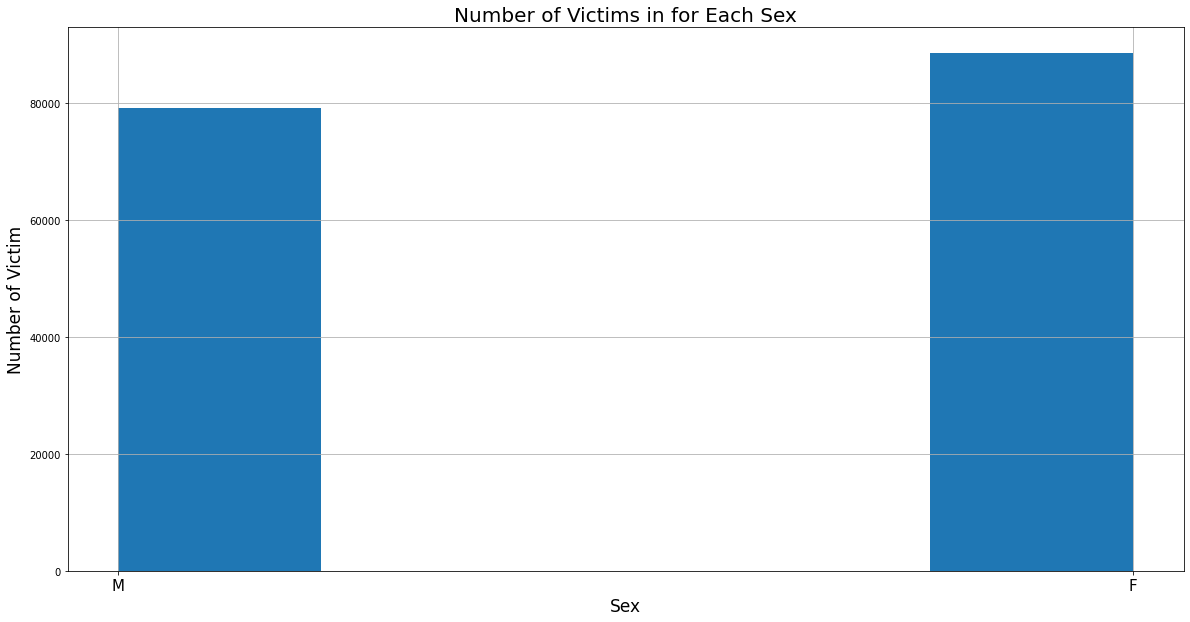

In [87]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=15)
df["Victim Sex"].hist(bins = 5)
plt.title("Number of Victims in for Each Sex", fontsize=20)
plt.xlabel("Sex", fontsize=17)
plt.ylabel("Number of Victim", fontsize=17)

## Multiple Variable Plots

In [88]:
dummy = pd.get_dummies(df["Level of Offense"])
dummy.dtypes

FELONY         uint8
MISDEMEANOR    uint8
VIOLATION      uint8
dtype: object

In [89]:
df2 = pd.concat([df, dummy], axis = 1)
df2.head()

,Date Reported,Borough,Offense Description,Crime Completion,Level of Offense,Location of Occurence,Premises Description,Suspect Age,Suspect Race,Suspect Sex,Victim Age,Victim Race,Victim Sex,Latitude,Longitude,FELONY,MISDEMEANOR,VIOLATION
0,2019-07-15,MANHATTAN,PETIT LARCENY,COMPLETED,MISDEMEANOR,INSIDE,DRUG STORE,NaN,NaN,NaN,NaN,NaN,NaN,40.805189,-73.966087,0,1,0
1,2019-07-15,MANHATTAN,BURGLARY,COMPLETED,FELONY,NaN,BAR/NIGHT CLUB,NaN,NaN,NaN,NaN,NaN,NaN,40.805700,-73.968120,1,0,0
2,2019-07-15,QUEENS,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,FRONT OF,SHOE,NaN,NaN,NaN,65+,WHITE,M,40.580206,-73.835846,0,1,0
3,2019-07-15,BRONX,HARRASSMENT 2,COMPLETED,VIOLATION,REAR OF,RESIDENCE-HOUSE,NaN,BLACK,M,25-44,WHITE HISPANIC,F,40.862012,-73.852803,0,0,1
4,2019-07-15,BROOKLYN,ARSON,COMPLETED,FELONY,INSIDE,RESIDENCE-HOUSE,NaN,NaN,NaN,NaN,NaN,NaN,40.643306,-73.888138,1,0,0


Text(0.42499999999999716, 0.5, 'Felonies')

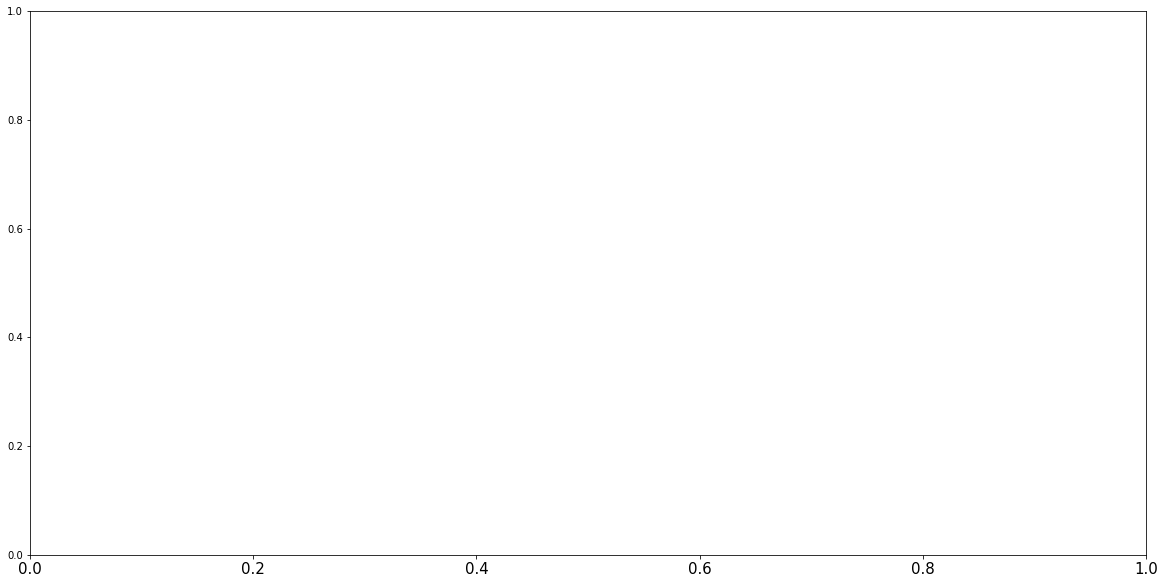

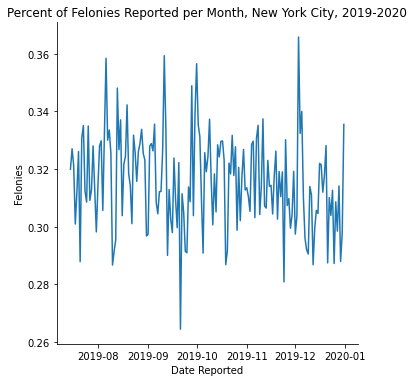

In [100]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=15)
sns.relplot(x="Date Reported", y= "FELONY", data=df2, kind="line", ci=None)
plt.title("Percent of Felonies Reported per Month, New York City, 2019-2020")
plt.xlabel("Date Reported")
plt.ylabel("Felonies")

Text(0.42499999999999716, 0.5, 'Misdemeanors')

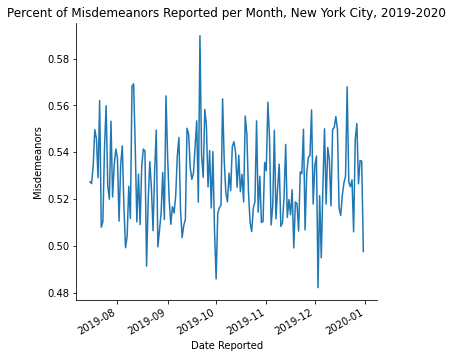

In [91]:
g = sns.relplot(x="Date Reported", y= "MISDEMEANOR", data=df2, kind="line", ci=None)
plt
g.fig.autofmt_xdate()

plt.title("Percent of Misdemeanors Reported per Month, New York City, 2019-2020")
plt.xlabel("Date Reported")
plt.ylabel("Misdemeanors")